![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

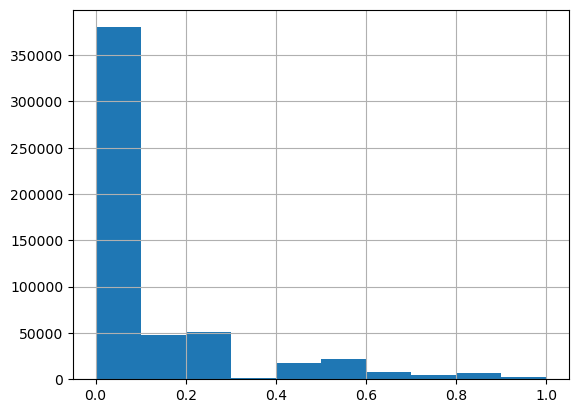

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()


count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 1
# Preprocesamiento de texto con CountVectorizer
cv = CountVectorizer(max_features=10)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Entrenamiento del modelo
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_cv, y_train)

# Predicción de las probabilidades en el set de test
y_pred = rf.predict(X_test_cv)

# Cálculo del MSE
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.0421272892712239


In [17]:
# Visualización de diccionario de palabras con su respectivo ID asignado
#cv.vocabulary_

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 2

# Preprocesamiento de texto con CountVectorizer
cvt = CountVectorizer(max_features=10,  lowercase=False, ngram_range=(3,3))
X_train_cvt = cvt.fit_transform(X_train)
X_test_cvt = cvt.transform(X_test)

# Entrenamiento del modelo
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_cvt, y_train)

# Predicción de las probabilidades en el set de test
y_pred_cvt = rf.predict(X_test_cvt)

# Cálculo del MSE
mse_cvt = metrics.mean_squared_error(y_test, y_pred_cvt)
print(f'MSE del modelo RandomForest con Trigramas: {mse_cvt}')

MSE del modelo RandomForest con Trigramas: 0.039032885150638436


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### Celda 3

La función TfidfVectorizer es otra técnica de tokenización utilizada para el preprocesamiento de texto en el aprendizaje automático. Al igual que CountVectorizer, convierte los documentos de texto en una matriz de frecuencias de palabras, que se utiliza como entrada para entrenar modelos de aprendizaje automático.

Sin embargo, TfidfVectorizer utiliza una técnica diferente para calcular las frecuencias de palabras. En lugar de contar simplemente la cantidad de veces que aparece cada palabra, TfidfVectorizer utiliza una medida llamada TF-IDF (Term Frequency-Inverse Document Frequency) para ponderar las frecuencias de palabras.

La medida TF-IDF se calcula multiplicando la frecuencia de una palabra en un documento (TF) por el inverso de la frecuencia de la palabra en todo el corpus (IDF). Es decir, la medida TF-IDF refleja la importancia de una palabra en un documento en comparación con su importancia en todo tipo de textos escritos en un determinado idioma o tema.

#### Ventajas
1. La ventaja de utilizar TfidfVectorizer es que esta técnica puede ayudar a reducir la importancia de palabras comunes que aparecen en muchos documentos, pero que no proporcionan información útil para la tarea de clasificación.
2. También puede ayudar a identificar palabras que son más distintivas y relevantes para la tarea de clasificación.

#### Desentajas
1. CountVectorizer es más sencillo y rápido de utilizar que TfidfVectorizer, ya que solo cuenta la frecuencia de las palabras y no utiliza medidas de ponderación.
2. CountVectorizer puede ser más útil en algunas tareas de clasificación de texto, como la identificación de idiomas o la detección de spam, donde la frecuencia de las palabras es más importante que su importancia relativa en el corpus.

#### Conclusiones
1. TfidfVectorizer puede ser más útil en tareas de clasificación de texto donde la importancia relativa de las palabras es importante y se desea reducir la importancia de palabras comunes. 
2. CountVectorizer puede ser más sencillo y rápido de utilizar y puede ser más adecuado para tareas de clasificación de texto donde la frecuencia de las palabras es más importante.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 4
# Preprocesamiento de texto con CountVectorizer
tfidv = TfidfVectorizer(max_features=10)
X_train_tfidv = tfidv.fit_transform(X_train)
X_test_tfidv = tfidv.transform(X_test)

# Entrenamiento del modelo
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_tfidv, y_train)

# Predicción de las probabilidades en el set de test
y_pred_tfidv = rf.predict(X_test_tfidv)

# Cálculo del MSE
mse_tfidv = metrics.mean_squared_error(y_test, y_pred_tfidv)
print(f'MSE del modelo RandomForest la función TfidfVectorizer: {mse_tfidv}')


MSE del modelo RandomForest la función TfidfVectorizer: 0.041316977632194135


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

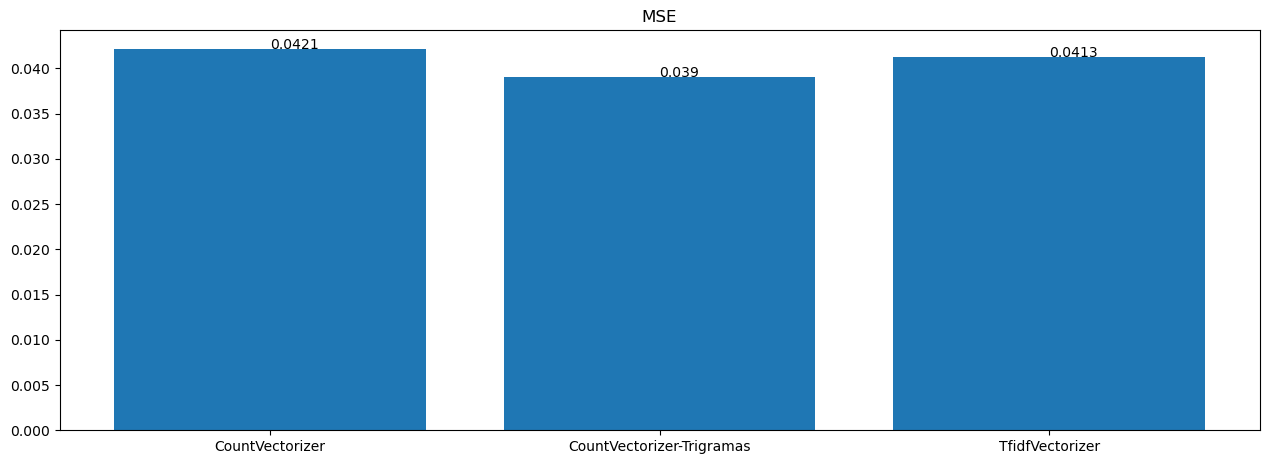

In [19]:
# Celda 5
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])

ax.set_title("MSE")
ejeX = ['CountVectorizer','CountVectorizer-Trigramas','TfidfVectorizer']
ejeY = [round(mse,4), round(mse_cvt,4), round(mse_tfidv,4), ]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

#### Análisis del desempelño de los modelos

La figura generada al final del código muestra que el mejor desempeño se obtiene con el segundo modelo (CountVectorizer con Trigramas), seguido por el tercer modelo (TfidfVectorizer). El primer modelo (CountVectorizer) tiene el peor desempeño. Debido a que un modelo con un MSE menor es mejor que uno con un MSE mayor.

El MSE (error cuadrático medio) es una medida del error de un modelo de regresión que mide la diferencia promedio al cuadrado entre los valores predichos y los valores reales. Un valor de MSE más bajo indica que las predicciones del modelo están más cerca de los valores reales. Por lo tanto, un modelo con un MSE menor tiene un mejor desempeño predictivo que uno con un MSE mayor. 